# Biểu đồ Waffle, Word Cloud, và Sơ đồ hồi quy

Thời lượng ước tính: **30** phút

## Mục tiêu

Sau khi hoàn thành bài lab này, bạn sẽ có thể:

-   Tạo Word cloud và biểu đồ Waffle
-   Tạo sơ đồ hồi quy với thư viện Seaborn


## Bảng nội dung

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Khám phá tập dữ liệu với _p_andas](#0)<br>
2.  [Tải và chuẩn bị dữ liệu](#2)<br>
3.  [Trực quan hóa dữ liệu bằng Matplotlib](#4) <br>
4.  [Biểu đồ Waffle](#6) <br>
5.  [Word Cloud](#8) <br>
6.  [Sơ đồ hồi quy](#10) <br>
    </div>


# Khám phá tập dữ liệu với _pandas_ và Matplotlib<a id="0"></a>

Công cụ: Khóa học này phụ thuộc rất nhiều vào [_pandas_](http://pandas.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) and [**Numpy**](http://www.numpy.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) để sắp xếp, phân tích và trực quan hóa dữ liệu. Thư viện biểu đồ cơ bản mà chúng ta sẽ khám phá trong khóa học là [Matplotlib](http://matplotlib.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Tập dữ liệu: Cuộc di cư đến Canada từ năm 1980 đến 2013 - [ Luồng di cư quốc tế đến và đi từ các quốc gia được chọn - Bản sửa đổi năm 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) từ trang web của Liên hợp quốc.

Tập dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế được ghi lại bởi các quốc gia điểm đến. Dữ liệu thể hiện cả dòng di cư vào và ra theo nơi sinh, quốc tịch hoặc nơi cư trú trước đây / hay sau này đối với cả người nước ngoài và người trong nước. Trong bài lab này, chúng ta sẽ tập trung vào dữ liệu Nhập cư Canada.


# Tải và chuẩn bị dữ liệu <a id="2"></a>


Nhập các mô-đun cơ bản:


In [28]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

Hãy tải xuống và nhập tập dữ liệu Canadian Immigration chính của chúng ta bằng cách sử dụng phương thức *pandas* `read_excel()`. Thông thường, trước khi chúng ta có thể làm điều đó, chúng ta cần tải xuống một mô-đun mà *pandas* yêu cầu để đọc trong tệp excel. Mô-đun này là **xlrd**. Để thuận tiện, chúng tôi đã cài đặt sẵn mô-đun này, vì vậy bạn sẽ không phải lo lắng về điều đó. Nếu không, bạn sẽ cần chạy dòng code sau để cài đặt mô-đun **xlrd**:

```
!conda install -c anaconda xlrd --yes
```


Tải tập dữ liệu và đọc nó trong khung dữ liệu pandas:


In [29]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy nhìn vào 5 item đầu tiên trong tập dữ liệu của chúng ta.


In [30]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Hãy tìm ra có bao nhiêu mục nhập trong tập dữ liệu.

> Indented block




In [31]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Dọn dẹp dữ liệu. Chúng ta sẽ tạo một số thay đổi đối với tập dữ liệu gốc để dễ tạo các hình ảnh trực quan hơn. Tham khảo Introduction to Matplotlib and Line Plots và Area Plots, Histograms, and Bar Plots để biết thêm mô tả hi tiết về quá trình xử lý.


In [32]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

In [33]:
# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

In [34]:
# add total column
df_can['Total'] = df_can.select_dtypes(include=['int64']).sum(axis=1)

In [35]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

In [36]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

In [37]:
df_can['Total']

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

In [38]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Trực quan hóa dữ liệu bằng Matplotlib<a id="4"></a>


Nhập `matplotlib`:


In [25]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.4


# Biểu đồ Waffle <a id="6"></a>

`Biểu đồ waffle` là một hình ảnh trực quan khá thú vị thường được tạo ra để hiển thị tiến trình đạy được mục đích. Nó thường là một lựa chọn hiệu quả khi bạn đang cố thêm những tính năng trực quan hóa thú vị vào một hình ảnh chủ yếu chứa các hàng như trong Excel.


Hãy xem lại các case study trong bài học trước về Đan Mạch, Na Uy, và Thụy Điển.


In [27]:
# let's create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Thật không may, không giống như R, biểu đồ `waffle` không được tích hợp bất kể thư viện trực quan hóa Python nào. Do đó, chúng ta sẽ học cách tạo chúng từ đầu.


**Bước 1.** Bước đầu tiên để tạo biểu đồ waffle xác định phần trăm của mỗi loại so với tổng.


In [28]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Bước 2.** Bước thứ 2 là xác định tổng kích thước của biểu đồ `waffle`.


In [29]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Bước 3.** Bước thứ 3 là dùng tỉ lệ phần trăm của mỗi loại để xác định số lượng tiêu đề tương ứng của nó.


In [30]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Dựa trên tỉ lệ đã tính, Đan Mạch sẽ chiếm 129 tiêu đề trong biểu đồ `waffle`, Na Uy chiếm 77, và Thụy Điển chiếm 194.


**Bước 4.** Bước thứ 4 là tạo ra một ma trận giống với biểu đồ `waffle` và phân bố các thành phần của nó.


In [31]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


Hãy cùng xem ma trận trông như thế nào nhé.


In [32]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Đúng như kì vọng, ma trận có 3 loại và tổng số lượng thực thể của từng loại khớp với tổng số tiêu đề được phân bố cho mỗi loại.


**Bước 5.** Ánh xạ ma trận biểu đồ `waffle` với một hình ảnh.


<Figure size 640x480 with 0 Axes>

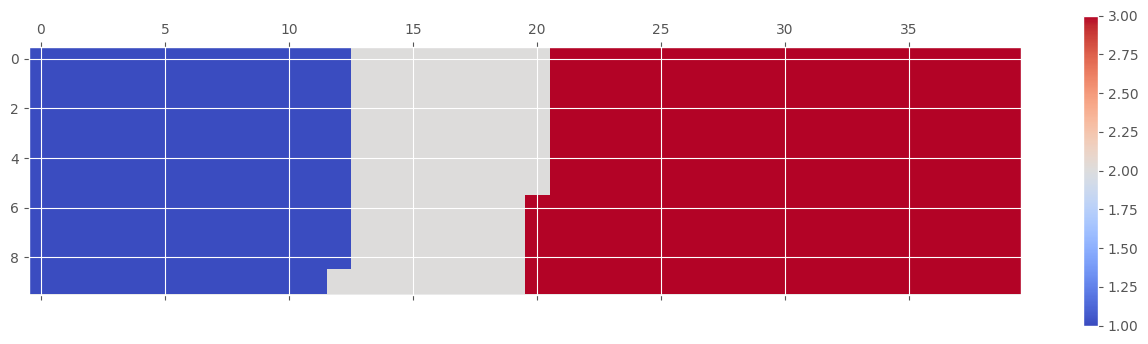

In [33]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Bước 6.** Làm đẹp biểu đồ.


([], [])

<Figure size 640x480 with 0 Axes>

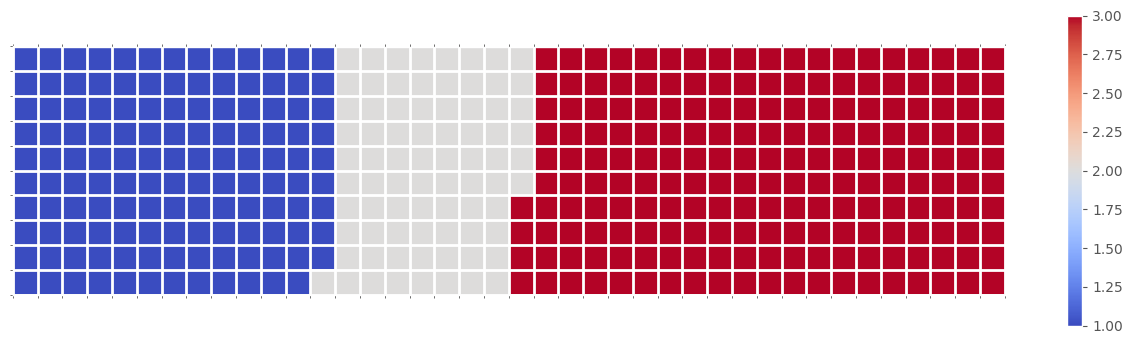

In [34]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Bước 7.** Tạo phần chú thích và thêm nó vào biểu đồ.


C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\2170737822.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\2170737822.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\2170737822.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

<Figure size 640x480 with 0 Axes>

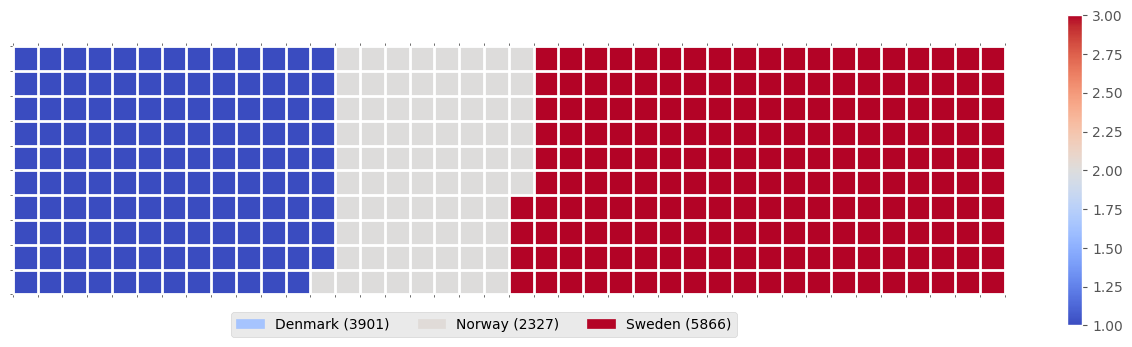

In [35]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Như vậy là xong! Biểu đồ `waffle` này trông thật _đẹp mắt_  có phải không?


Nếu lặp lại cả 7 bước này mỗi lần chúng ta tạo một biểu đồ `waffle` thì thật không hiệu quả. Hãy kết hợp cả 7 bước này vào một hàm gọi là _create_waffle_chart_. Hàm này sẽ lấy các tham số sau làm input:

> 1.  **categories**: Các loại hoặc lớp duy nhất trong khung dữ liệu.
> 2.  **values**: Các giá trị tương ứng với các loại hoặc các lớp.
> 3.  **height**: Xác định chiều cao của biểu đồ waffle.
> 4.  **width**: Xác định chiều rộng của biểu đồ waffle.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: Để làm cho hàm của chúng ta dễ tổng quát hơn, chúng ta sẽ thêm tham số này để giải quyết các kí hiệu có thể được liên kết với một giá trị chẳng hạn như %, $, v.v. **value_sign** có giá trị mặc định là một xâu kí tự rỗng.


In [36]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Bây giờ, để tạo một biểu đồ `waffle`, tất cả những gì chúng ta cần làm là gọi hàm `create_waffle_chart`. Hãy xác định các tham số input:


In [37]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Bây giờ hãy gọi hàm để tạo biểu đồ `waffle`.


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\519984398.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\519984398.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\519984398.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

<Figure size 640x480 with 0 Axes>

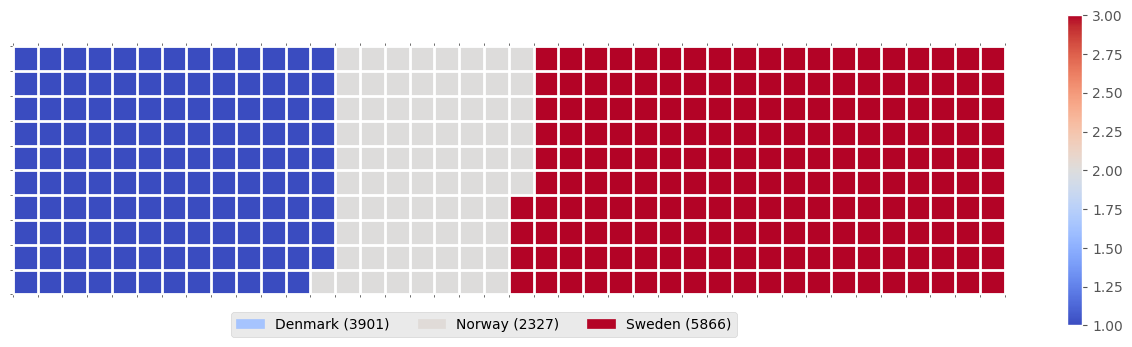

In [38]:
create_waffle_chart(categories, values, height, width, colormap)

Có vẻ như có gói Python mới để tạo `biểu đồ waffle` gọi là [PyWaffle](https://github.com/ligyxy/PyWaffle), nhưng nó trông giống như một thư viện đang được xây dựng. Nhưng bạn hãy cứ thử dùng nó đi nhé.


# Word Clouds <a id="8"></a>

Đám mây `Word` (hay còn gọi là text cloud hoặc tag cloud) hoạt động rất đơn giản: từ càng cụ thể xuất hiện trong nguồn dữ liệu văn bản (như là lời nói, blog post, hoặc cơ sở dữ liệu), thì nó sẽ xuất hiện càng lớn và càng đậm trong word cloud.


May mắn thay, có gói Python đã tồn tại ngay trong Python để tạo `word` clouds. Gói gọi là `word_cloud` được phát triển bởi **Andreas Mueller**. Bạn có thể tìm hiểu thêm về gói qua [link](https://github.com/amueller/word_cloud/) sau.

Hãy sử dụng gói này để học cách tạo một word cloud cho một văn bản chữ cho trước.


Đầu tiên, hãy cài đặt gói.


In [42]:
# install wordcloud
!conda install -c conda-forge wordcloud --yes

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3\envs\aio24_env

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hcfcfb64_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hcfcfb64_1          20 KB  conda-forge
    ca-certificates-2024.6.2   |       h56e8100_0         153 KB  conda-forge
    contourpy-1.2.1            |  py310h232114e_0         186 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_0          13 KB  conda-forge
    fonttools-4.53.0           |  py310ha8f682b_0         1.9 MB  conda-forge
    intel-openmp-2024.1.0      |     h57928b3_966         1.5 MB  conda-forge
    jpeg-9e                    |       hcfcfb64_3         283 KB  conda-forge
    kiwis

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(182): Could not remove or rename C:\Users\Admin\anaconda3\envs\aio24_env\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [43]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


`Word` cloud thường được sử dụng để hiển thị các phân tích cấp độ cao và trực quan hóa các dữ liệu văn bản. Chính xác, chúng ta hãy tìm hiểu kỹ từ tập dữ liệu nhập cư và làm việc với một ví dụ liên quan đến việc phân tích dữ liệu văn bản. Hãy thử phân tích một cuốn tiểu thuyết ngắn được viết bởi **Lewis Carroll** có tên _Alice's Adventures in Wonderland_. Hãy tiếp tục và tải file _.txt_ của cuốn tiểu thuyết.


In [4]:
import requests

# URL của tệp tin cần tải xuống
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt'

# Gửi yêu cầu tải tệp tin từ URL
response = requests.get(url)

# Kiểm tra xem yêu cầu tải xuống có thành công không (status code 200)
if response.status_code == 200:
    # Lưu nội dung của yêu cầu tải xuống vào một tệp tin cục bộ
    with open('alice_novel.txt', 'wb') as f:
        f.write(response.content)
    print('File downloaded and saved!')
else:
    print('Failed to download file:', response.status_code)

File downloaded and saved!


Tiếp theo, hãy sử dụng các từ dừng (stopword) mà chúng tôi đã nhập từ `word_cloud`. Chúng tôi sử dụng hàm _set_ để loại bỏ bất kỳ từ dừng thừa nào.


In [11]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

Tạo một đối tượng word cloud và tạo một word cloud. Để đơn giản, hãy tạo một word cloud chỉ sử dụng 2000 từ đầu tiên của tiểu thuyết.


In [14]:
from wordcloud import WordCloud

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Thật tuyệt! Bây giờ `word` đã được tạo, hãy trực quan hóa nó.


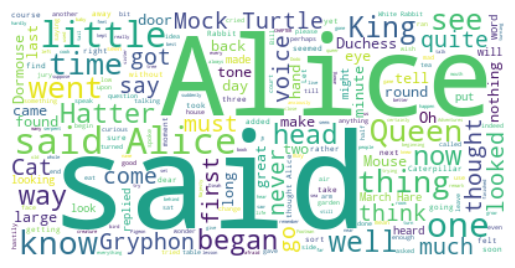

In [17]:
import matplotlib.pyplot as plt

# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Thật thú vị! Trong 2000 từ đầu tiên của tiểu thuyết, các từ thông dụng nhất là **Alice**, **said**, **little**, **Queen**, v.v. Hãy đặt lại kích thước đám mây để chúng ta có thể thấy các từ ít xuất hiện rõ ràng hơn.


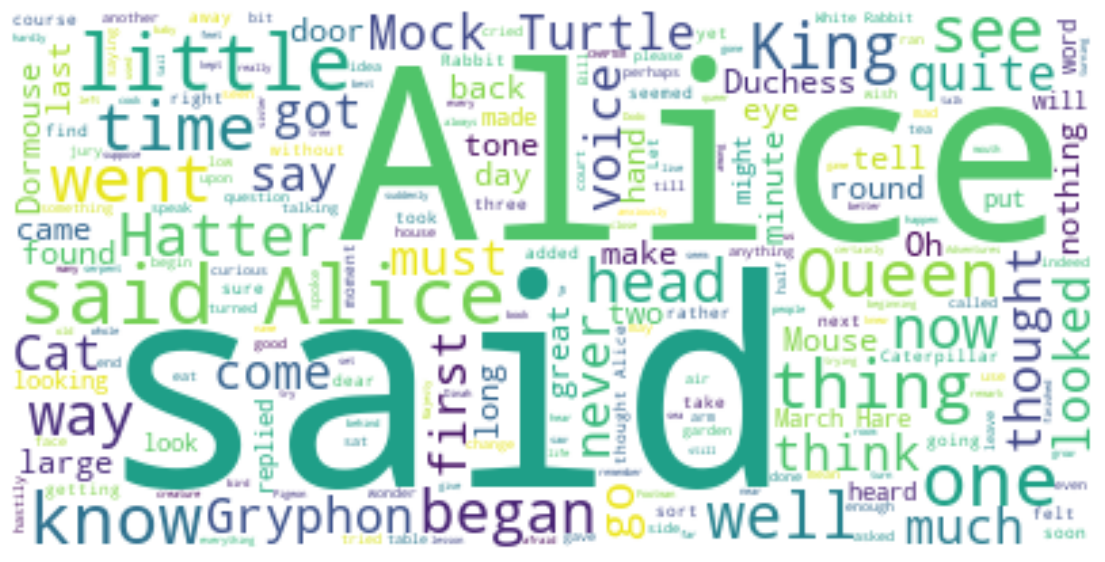

In [18]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Tốt hơn nhiều rồi! Tuy nhiên, **said** không thực sự là một từ chứa nhiều thông tin. Vì vậy, hãy đưa nó vào từ dừng và tạo lại đám mây.


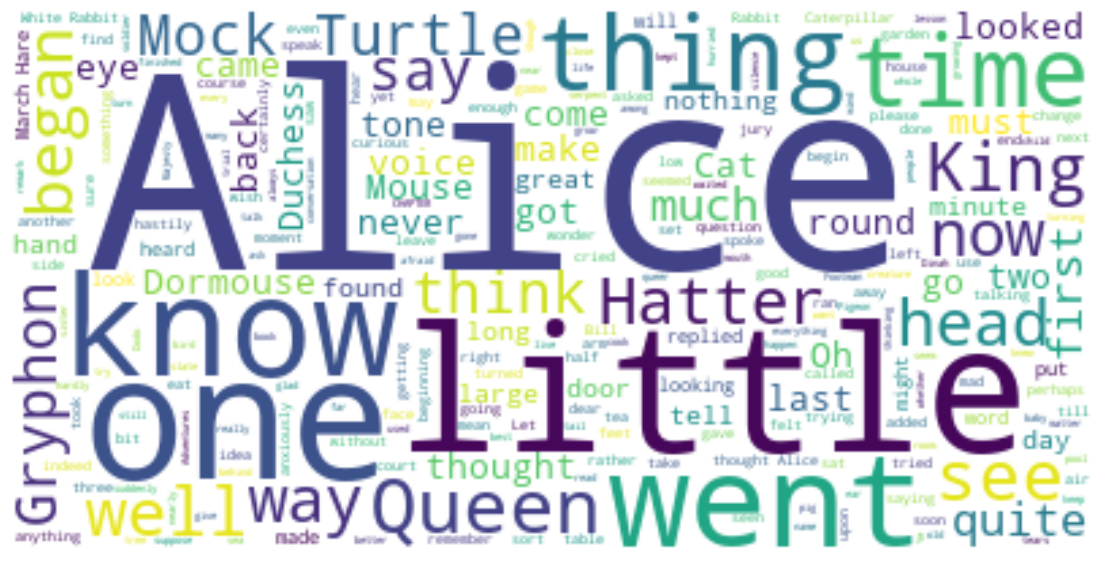

In [19]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Tuyệt vời! Nó trông thực sự thú vị! Một điều thú vị khác mà bạn có thể thực hiện với gói `word_cloud` là chồng các từ lên một mặt nạ có hình dạng bất kỳ. Hãy sử dụng mặt nạ của Alice và thỏ của cô ấy. Chúng tôi đã tạo mặt nạ cho bạn, vì vậy hãy tiếp tục tải xuống và gọi nó là _alice_mask.png_.


In [20]:
import requests

# URL của tệp tin cần tải xuống
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png'

# Gửi yêu cầu tải tệp tin từ URL
response = requests.get(url)

# Kiểm tra xem yêu cầu tải xuống có thành công không (status code 200)
if response.status_code == 200:
    # Lưu nội dung của yêu cầu tải xuống vào một tệp tin cục bộ
    with open('alice_mask.png', 'wb') as f:
        f.write(response.content)
    print('File downloaded and saved!')
else:
    print('Failed to download file:', response.status_code)

File downloaded and saved!


Hãy xem các mặt nạ này trông như nào nhé.


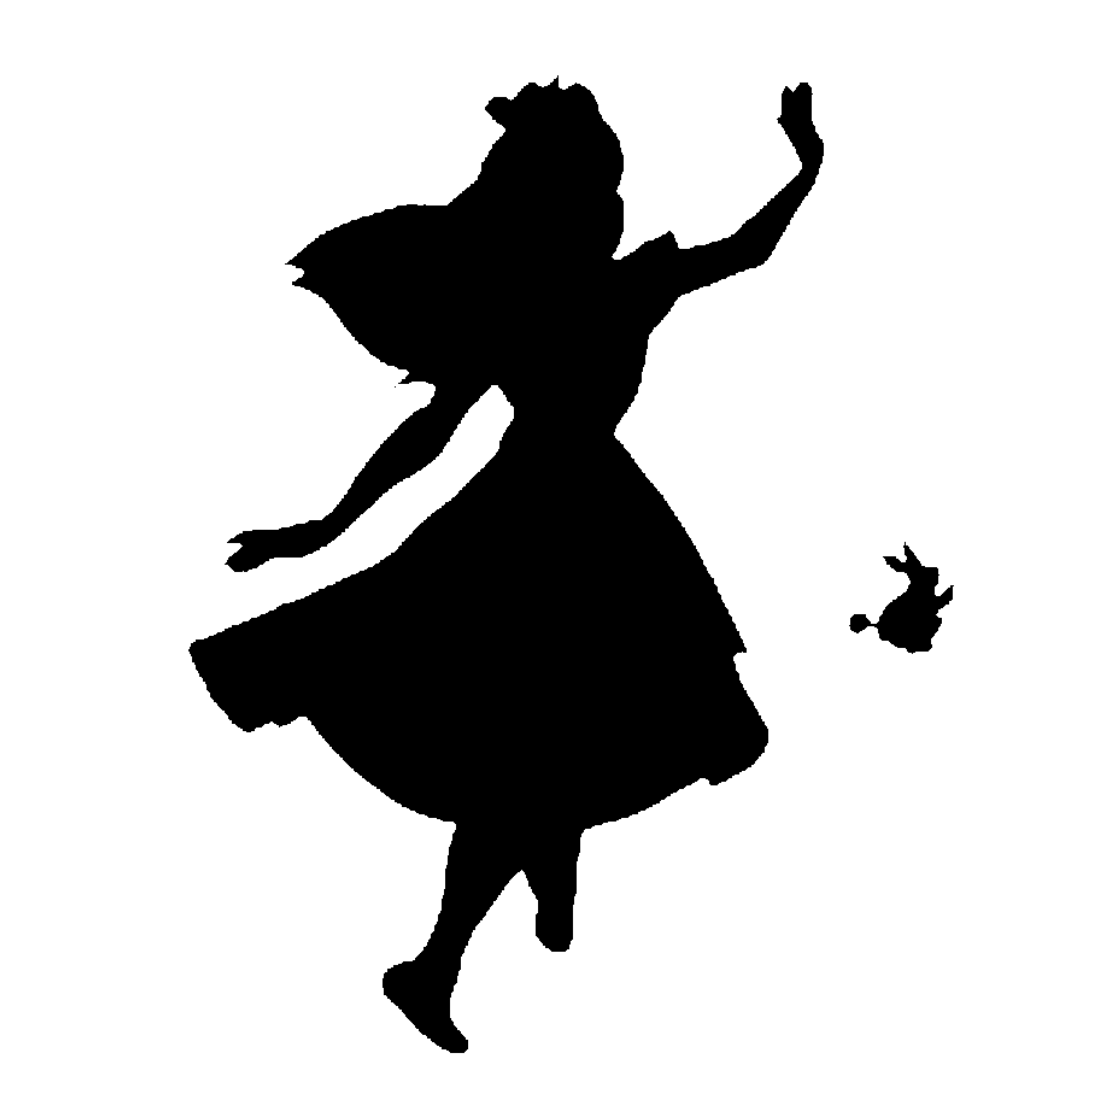

In [24]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open('alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Định hình đám mây `word` theo mặt nạ rất đơn giản bằng cách sử dụng gói` word_cloud`. Để đơn giản, chúng ta sẽ tiếp tục sử dụng 2000 từ đầu tiên trong cuốn tiểu thuyết.


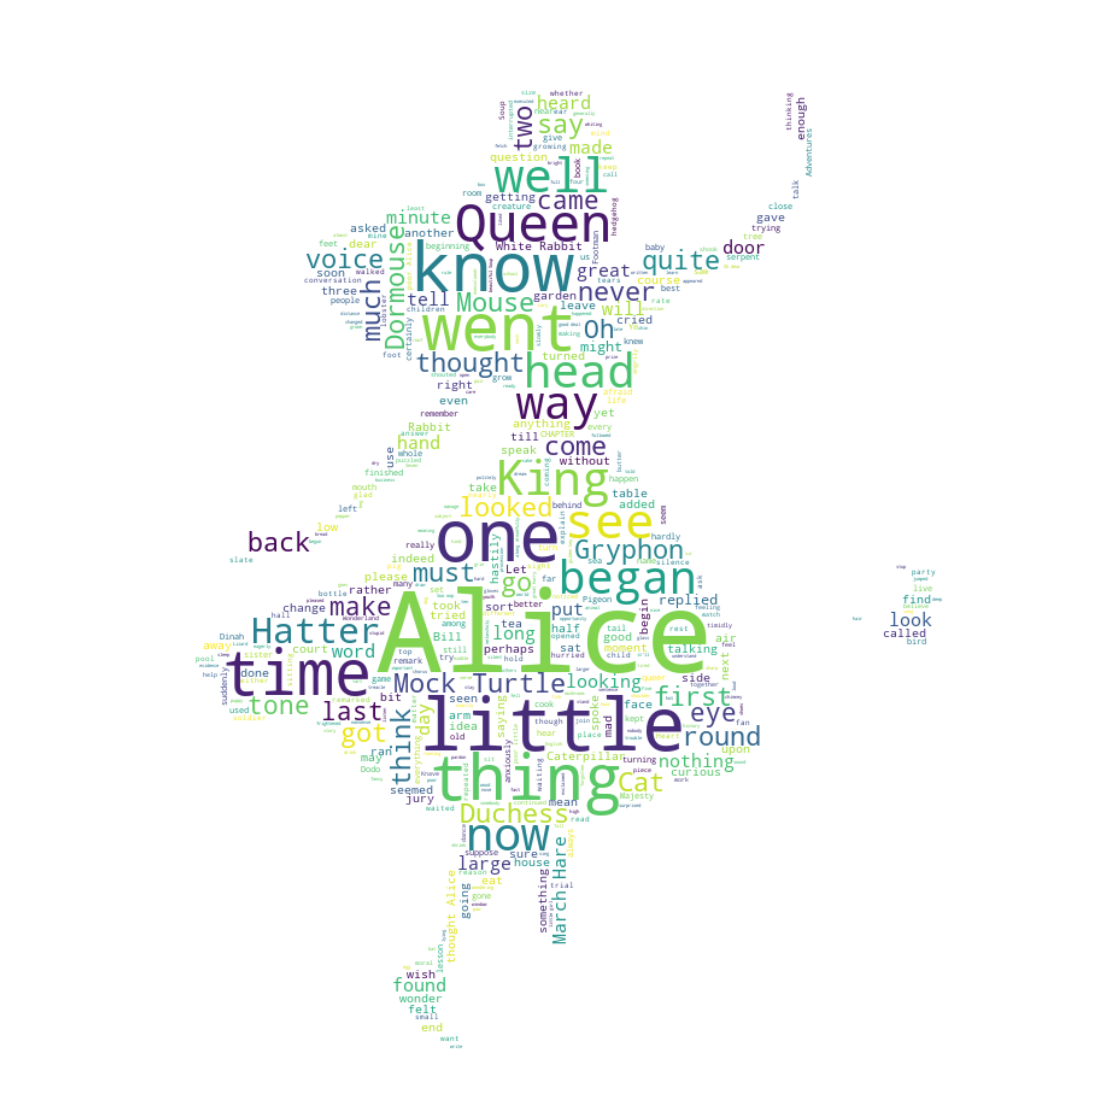

In [25]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Rất ấn tượng!


Thật không may, dữ liệu immmigration của chúng ta không có bất kỳ dữ liệu văn bản nào, nhưng nếu muốn thì sẽ có cách. Hãy tạo dữ liệu văn bản mẫu từ tập dữ liệu immmigration của chúng ta, chẳng hạn như dữ liệu văn bản gồm 90 từ.


Hãy nhớ lại dữ liệu của chúng ta trông như thế nào

In [39]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Và tổng dân nhập cư từ 1980 đến 2013 là bao nhiêu?


In [40]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Sử dụng các quốc gia có tên một từ, hãy sao chép tên của mỗi quốc gia dựa trên mức độ đóng góp của họ vào tổng lượng nhập cư.


In [42]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Chúng ta không có từ dừng nào ở đây, vậy nên không cần phải truyền chúng cho word cloud.


In [43]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


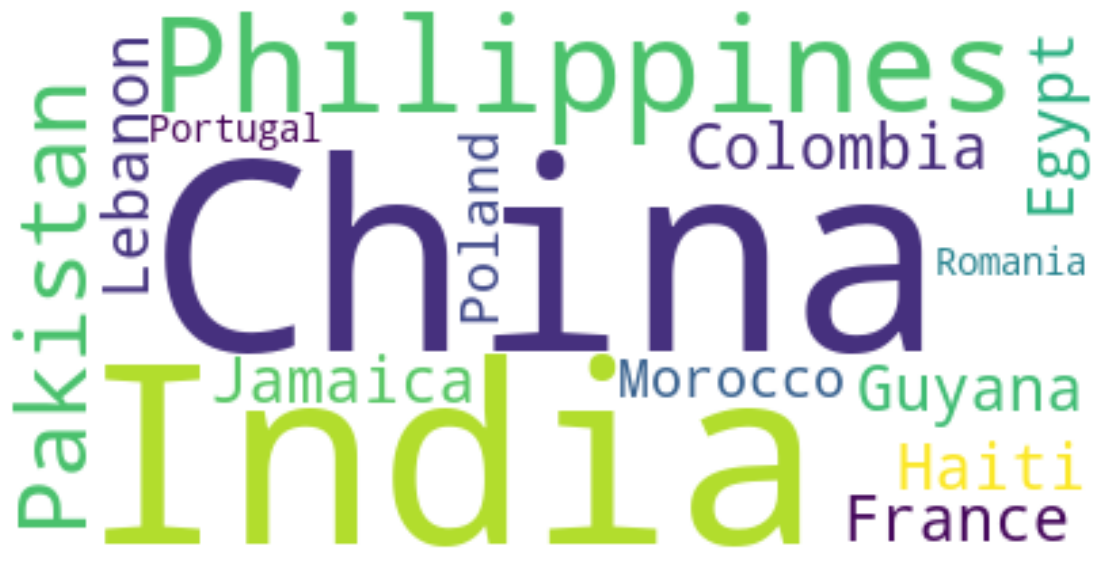

In [44]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Theo word cloud ở trên, có vẻ như phần lớn những người nhập cư đến từ một trong 15 quốc gia được hiển thị bởi word cloud. Một hình ảnh thú vị mà bạn có thể xây dựng, có lẽ là sử dụng bản đồ của Canada và một chiếc mặt nạ và chồng word cloud lên trên bản đồ của Canada. Đó sẽ là một hình ảnh xây lên sẽ rất thú vị!


# Sơ đồ hồi quy <a id="10"></a>

> Seaborn là thư viện trực quan hóa của Python dựa trên matplotlib. Nó cung cấp các giao diện bậc cao để vẽ các biểu đồ thống kê thú vị. Bạn có thể tìm hiểu thêm về _seaborn_ trong [link](https://seaborn.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) sau và về _sơ đồ hồi quy seaborn_ theo [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


Trong bài lab _Biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán và biểu đồ bong bóng_, chúng ta đã học cách tạo biểu đồ phân tán và khớp nó vào các đường hồi quy. Nó mất gần 20 dòng code để tạo biểu đồ phân tán cùng với khớp hồi quy. Trong phần cuối này, chúng ta sẽ khám phá _seaborn_ và xem mức độ hiệu quả khi tạo các đường và khớp hồi quy bằng thư viện này!


Đầu tiên, hãy cài đặt _seaborn_


In [45]:
# install seaborn
!conda install -c anaconda seaborn --yes

^C
Seaborn installed and imported!


Channels:
 - anaconda
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3\envs\aio24_env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB  anaconda
    bottleneck-1.3.5           |  py310h9128911_0         117 KB  anaconda
    brotli-1.0.9               |       h2bbff1b_7          18 KB  anaconda
    brotli-bin-1.0.9           |       h2bbff1b_7          21 KB  anaconda
    contourpy-1.0.5            |  py310h59b6b97_0         180 KB  anaconda
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB  anaconda
    fonttools-4.25.0           |     pyhd3eb1b0_0         674 KB  anaconda
    freetype-2.12.1            |       ha860e81_0         515 KB  anaconda
    giflib-5.2.1       

In [46]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Tạo một khung dữ liệu mới để lưu trữ tổng số dân nhập cư đã đến Canada mỗi năm trong giai đoạn 1980 - 2013.


In [47]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Với _seaborn_, tạo một sơ đồ hồi quy đơn giản như là gọi hàm **regplot**.


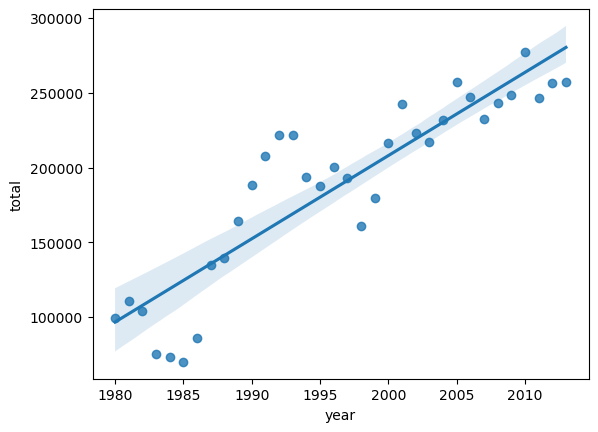

In [48]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Đó không phải là ma thuật; đó là _seaborn_! Bạn cũng có thể tùy chỉnh màu của biểu đồ phân tán và đường hồi quy. Hãy thay đổi màu sắc thành màu xanh lá cây.


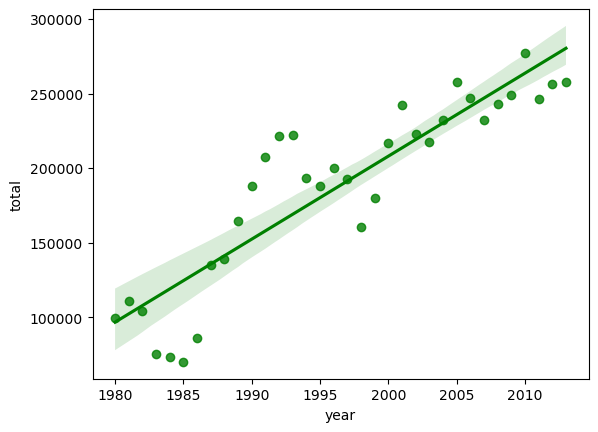

In [49]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Bạn luôn có thể tùy chỉnh hình dạng điểm đánh dấu, vì vậy thay vì điểm đánh dấu hình tròn, hãy sử dụng '+'.


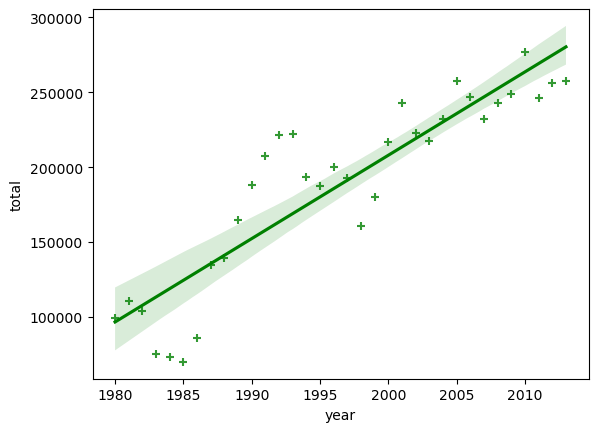

In [50]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')



```
# This is formatted as code
```

Hãy làm to biểu đồ lên một chút để nó trông hấp dẫn hơn.


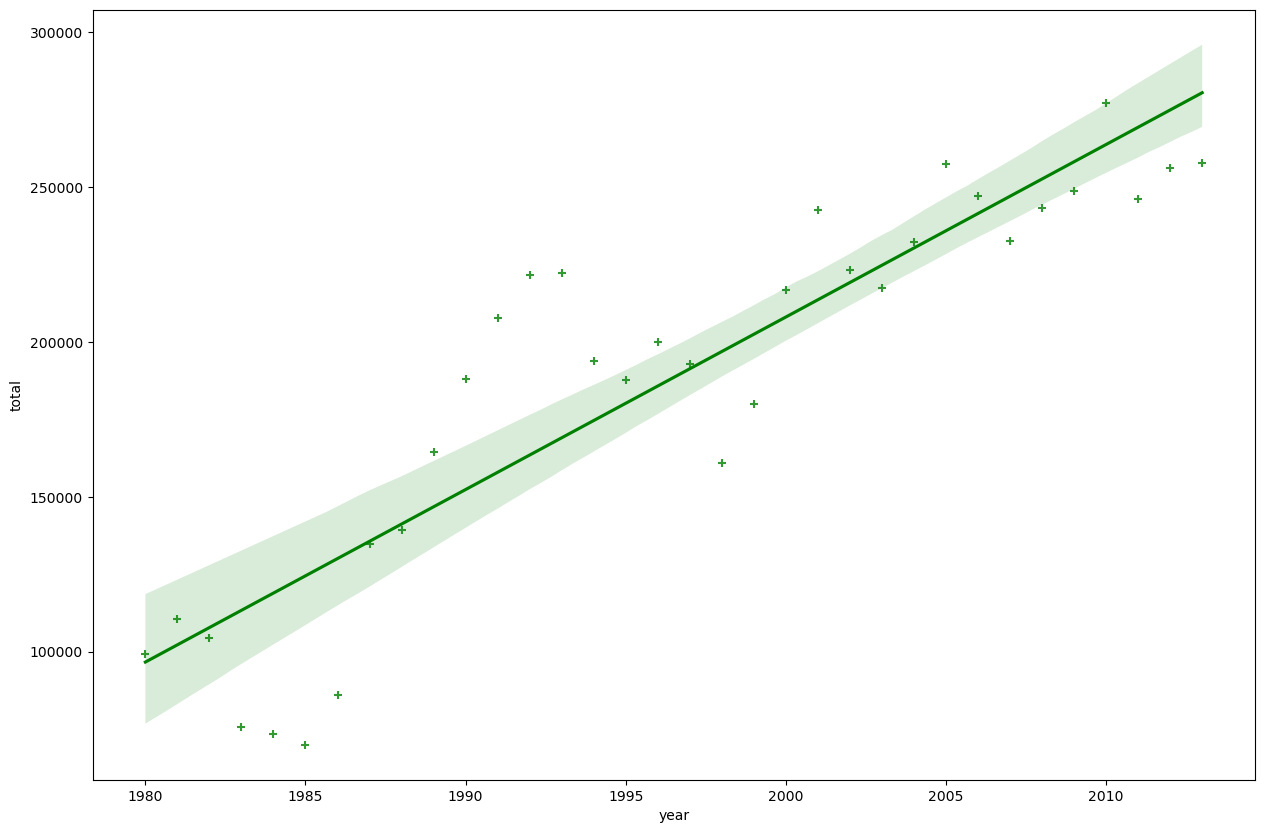

In [51]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Và hãy tăng kích thước của các điểm đánh dấu để chúng phù hợp với kích thước mới của hình, đồng thời thêm tiêu đề và các nhãn x- và y.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

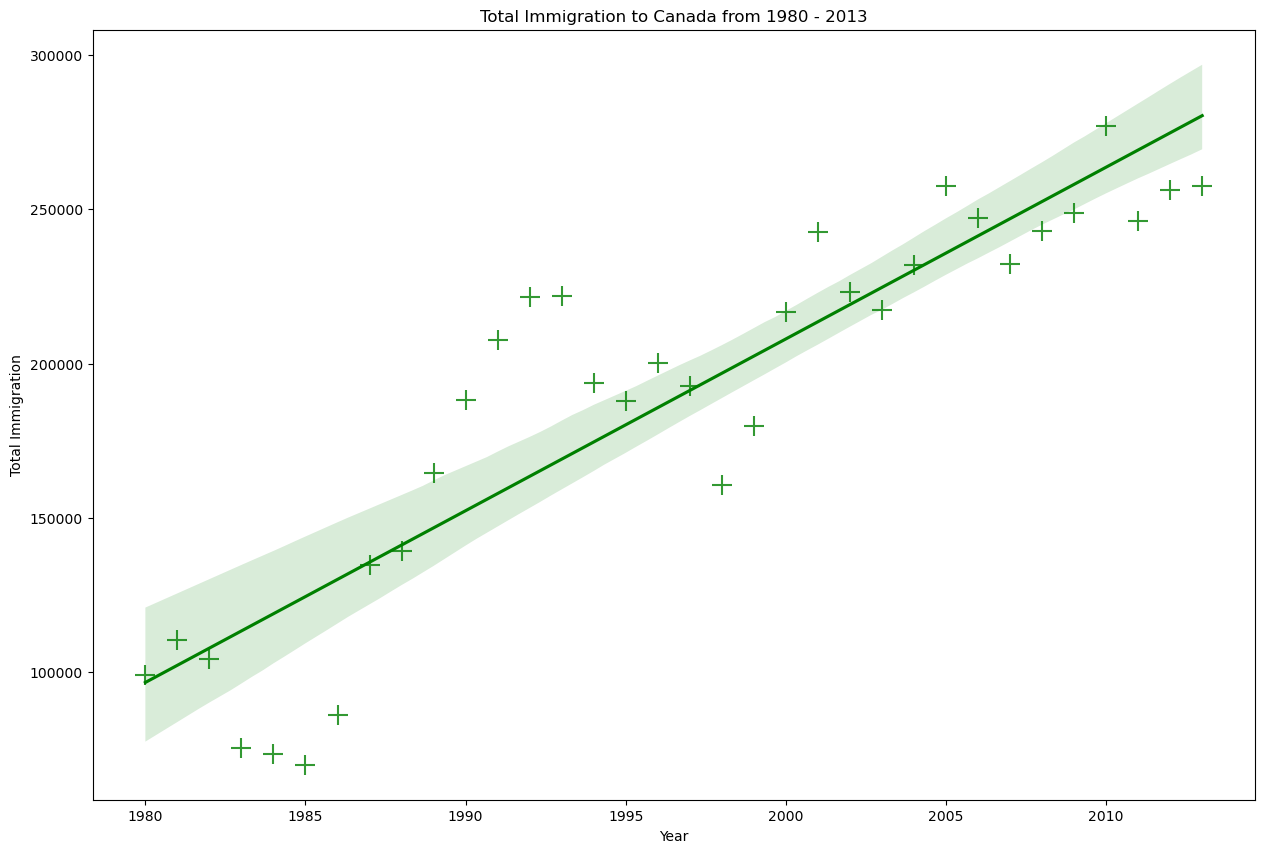

In [52]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title



```
# This is formatted as code
```

Và cuối cùng, hãy tăng kích thước phông chữ của các nhãn đánh dấu, tiêu đề và các nhãn x- và y để chúng trông phù hợp với các nội dung khác!


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

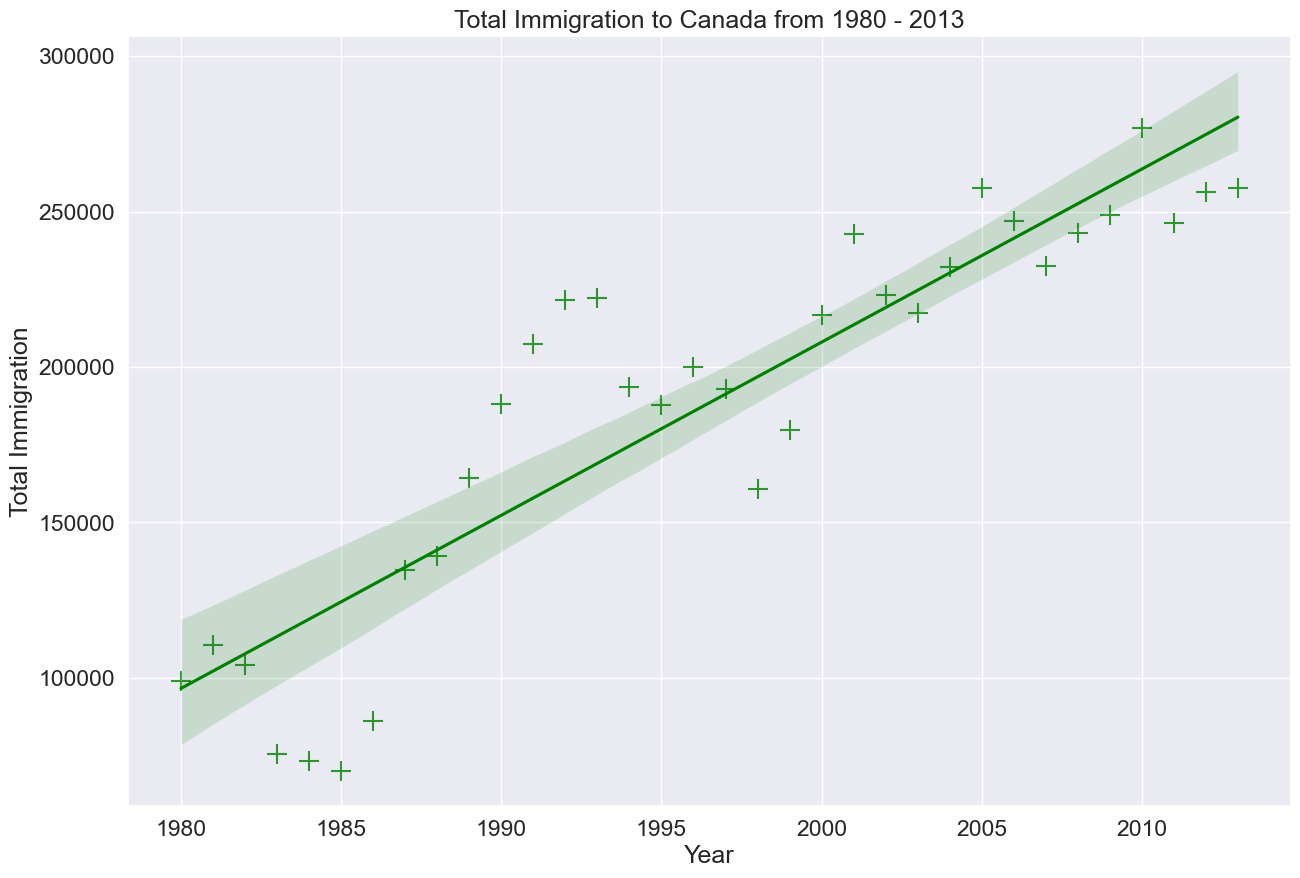

In [53]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Thật tuyệt! Một biểu đồ phân tán hoàn chỉnh có đường khớp hồi quy chỉ với 5 dòng code. Nó không thú vị hay sao?


Nếu không thích nền tím, bạn hoàn toàn có thể chuyển sang nền trắng cơ bản.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

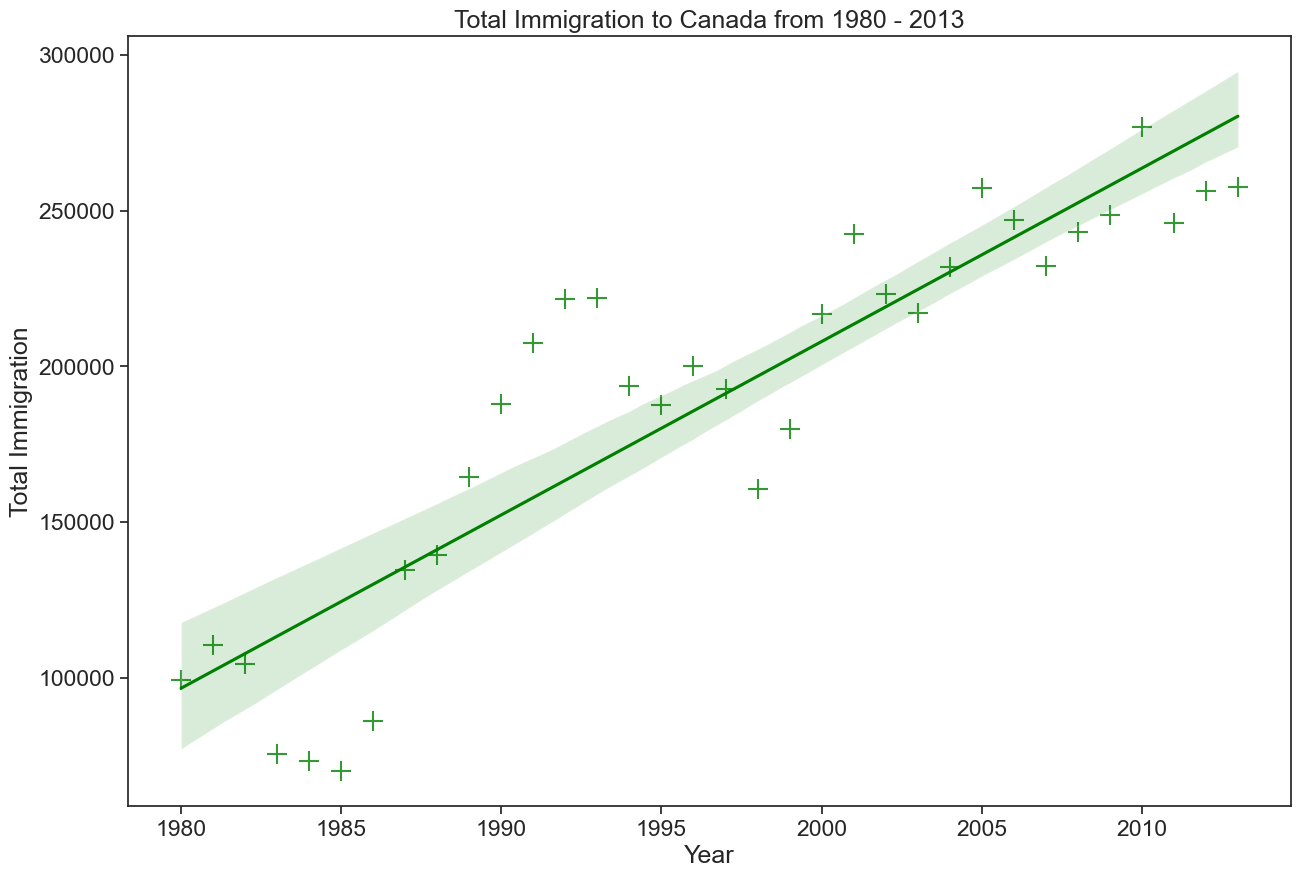

In [54]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Hoặc nền trắng với các đường kẻ ô vuông.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

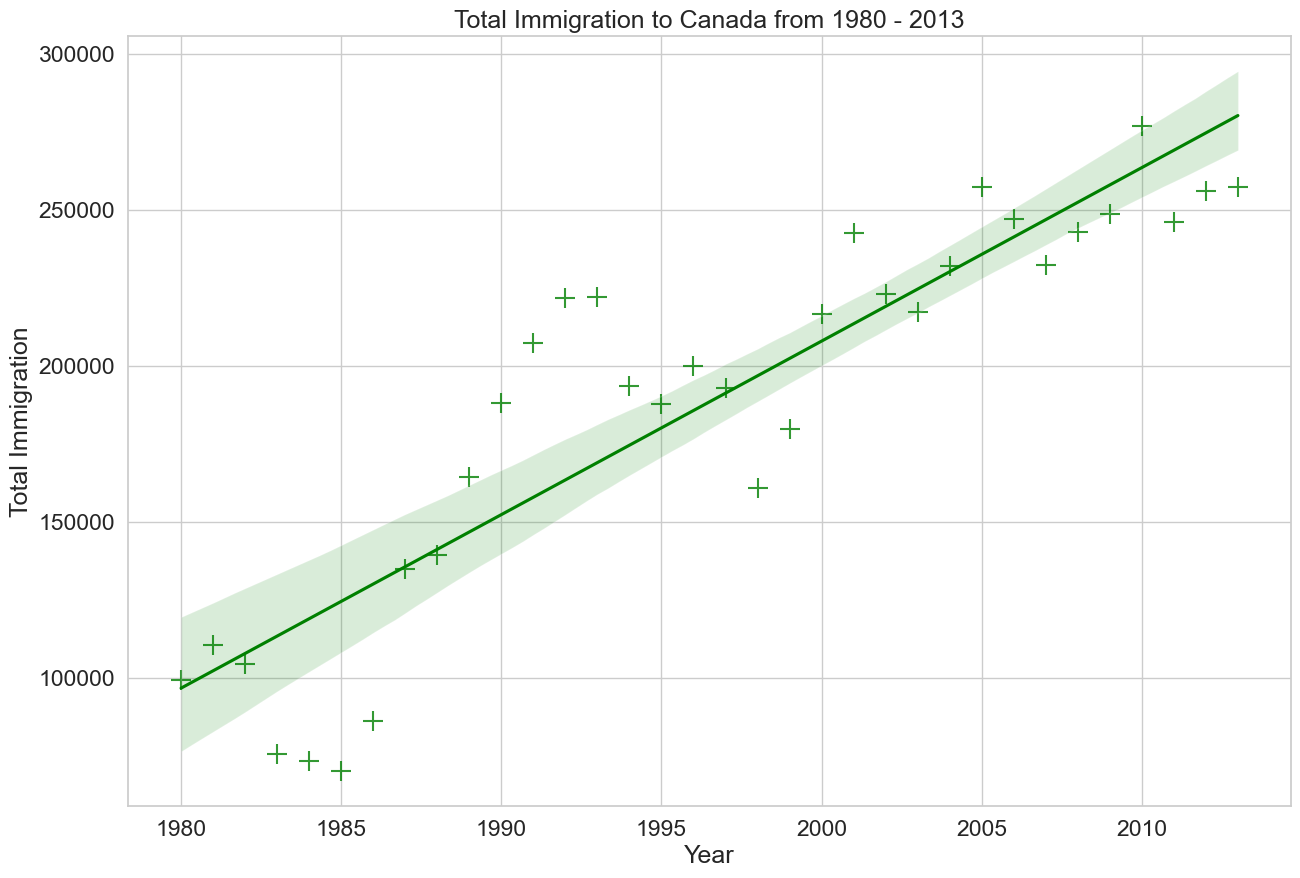

In [55]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

**Câu hỏi**: Sử dụng seaborn để tạo biểu đồ phân tán với đường hồi quy để hình dung tổng lượng nhập cư từ Đan Mạch, Thụy Điển và Na Uy đến Canada từ năm 1980 đến năm 2013.


Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

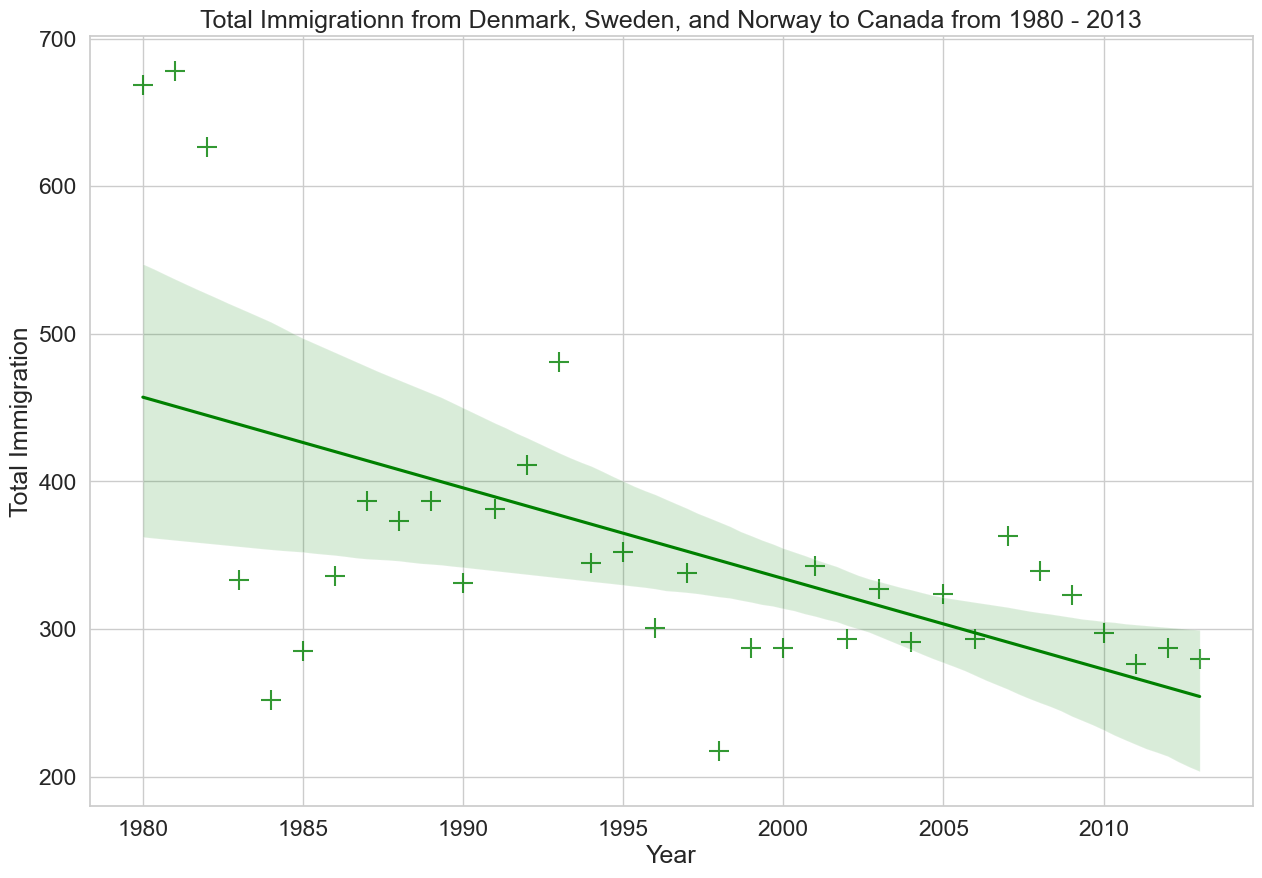

In [56]:
### type your answer here

#The correct answer is:

# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

```

</details>
